#  Tunisian Stock Market Financial Analysis, Bank Sector

# Objectifs :

- 1- Telecharger les données historiques de toutes les banques cotées en bourses.

- 2- Définir des fonctions pour faciliter l'interprétation et la visualisation des données.

- 3- Etude de la relation entre les différents marchés.

- 4- Présenter des modéles de prédictions.

# Introduction:

##### On compte actuellement 23 banques à savoir :

- Société Tunisienne de Banque « **STB** »

- Banque Nationale Agricole « **BNA** »

- Banque de l’Habitat « **BH** »

- Banque de Financement des Petites et Moyennes entreprises « **BFPME** »

- Banque Tunisienne de Solidarité « **BTS** »

- Banque de Tunisie et des Emirats « **BTE** »

- Banque Tuniso-Libyenne « **BTL** »

- Tunisian Saudi Bank « **TSB** »

- Banque Zitouna n'est pas coté

- Al Baraka Bank n'est pas coté

- Al Wifak International Bank « **WIFAK** »

- Amen Bank « **AB** »

- Attijari Bank « **ATB** »

- Arab Tunisian Bank « **ATB** »

- Arab Banking Corporation « **ABC** »

- Banque Internationale Arabe de Tunisie « **BIAT** »

- Banque de Tunisie « **BT** »

- Banque Tuniso Koweitienne « **BTK** »

- Banque Franco Tunisienne « **BFT** »

- Qatar National Bank- Tunis « **QNB-Tunis** »

- Union Bancaire de Commerce et d’Industrie « **UBCI** »

- Union Internationale de Banque « **UIB** »

##### Importation des bibliothèque :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import investpy
import mplfinance as mpf
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wg

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importation des données historiques 2010 - 2021

In [13]:
# Liste de tickers collecté des marché coté en bourse de tunisie secteur banque
bank_ticker = ['STB', 'BNA', 'BH', 'BFPME','BTS', 'BTE', 'BTL', 'TSB', 'ATB', 'ACB', 'BIAT', 'BT', 'BTK', 'BFT', 'QNB-Tunis', 'UBCI', 'UIB', 'BS', 'WIB', 'AB', 'WIFAK']

## Voir si la liste des ticker collecté existe dans la list des stock de investing pour Tunisie (filtre des ticker dans bank_ticker list et investing ticker list) 

stock_list = []
for i_ticker in bank_ticker:
    for j_ticker in investpy.stocks.get_stocks_list('Tunisia'):
        if i_ticker == j_ticker:
            stock_list.append(i_ticker)

# afiicher le résultat des ticker qu'on va telecharger leur données historique
print('-'*90)
print("Le Nombre des marché d'action qu'on va étudier après le filtre est 11\n" + str(stock_list))
print('-'*90)

------------------------------------------------------------------------------------------
Le Nombre des marché d'action qu'on va étudier après le filtre est 11
['STB', 'BNA', 'BH', 'ATB', 'BIAT', 'BT', 'UBCI', 'UIB', 'BS', 'AB', 'WIFAK']
------------------------------------------------------------------------------------------


###### On a crée une fonction pour faciliter le téléchargement des données pour chaque marché:

In [3]:
s_date = '26/5/2010'
e_date = '5/5/2021'
Tun = 'Tunisia'

def get_data(country, stock, start, end):
    data = investpy.get_stock_historical_data(country= country, stock = stock, from_date= start, to_date= end)
    data.drop('Currency', axis=1, inplace= True)
    
    data['Daily_Change'] = round(data.Open - data.Close, 4)
    
    data['Daily_pct_Change'] = round(data.Close.pct_change(), 4)
    data.Daily_pct_Change.fillna(0, inplace=True)
    
    data['Daily_log_rtn'] = round(np.log(data.Close.pct_change()+1), 4)
    data.Daily_log_rtn.fillna(0, inplace=True)

    return data

STB = get_data(Tun, 'STB', s_date, e_date)
BNA = get_data(Tun, 'BNA', s_date, e_date)
BH = get_data(Tun, 'BH', s_date, e_date)
ATB = get_data(Tun, 'ATB', s_date, e_date)
BIAT = get_data(Tun, 'BIAT', s_date, e_date)
BT = get_data(Tun, 'BT', s_date, e_date)
UBCI = get_data(Tun, 'UBCI', s_date, e_date)
UIB = get_data(Tun, 'UIB', s_date, e_date)
BS = get_data(Tun, 'BS', s_date, e_date)
AB = get_data(Tun, 'AB', s_date, e_date)
WIFAK = get_data(Tun, 'WIFAK', s_date, e_date)


In [6]:
STB.head(12)
BIAT.head(12)

,Open,High,Low,Close,Volume,Daily_Change,Daily_pct_Change,Daily_log_rtn
Date,,,,,,,,
2010-05-26,80.20,80.80,79.73,79.73,6839,0.47,0.0000,0.0000
2010-05-27,80.00,80.00,79.20,79.51,4768,0.49,-0.0028,-0.0028
2010-05-28,79.60,79.89,79.36,79.50,2929,0.10,-0.0001,-0.0001
2010-05-31,79.50,79.50,79.20,79.30,2969,0.20,-0.0025,-0.0025
2010-06-01,79.40,79.85,79.22,79.41,1634,-0.01,0.0014,0.0014
2010-06-02,79.50,79.70,79.46,79.60,2019,-0.10,0.0024,0.0024
2010-06-03,79.85,80.90,79.85,80.00,4712,-0.15,0.0050,0.0050
2010-06-04,80.02,80.60,80.00,80.00,4440,0.02,0.0000,0.0000
2010-06-07,80.00,80.01,80.00,80.01,1619,-0.01,0.0001,0.0001


#### Rendement mensuel

In [5]:
def volatility_plot(Ticker):
    if Ticker== 'STB':
        STB.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
        
    elif Ticker == 'BNA':
        BNA.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
    
    elif Ticker == 'BH':
        BH.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
        
    elif Ticker == 'BIAT':
        BIAT.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
    
    elif Ticker == 'ATB':
        ATB.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
        
    elif Ticker == 'BT':
        BT.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
        
    elif Ticker == 'UBCI':
        UBCI.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
        
    elif Ticker == 'UIB':
        UIB.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))

    elif Ticker == 'BS':
        BS.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
        
    elif Ticker == 'AB':
        AB.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6))
        
    elif Ticker == 'WIFAK':
        WIFAK.resample('BM').apply(lambda x: x[-1]).Close.pct_change().plot(figsize = (15,6)) 

        
interact(volatility_plot, Ticker = stock_list)

interactive(children=(Dropdown(description='Ticker', options=('STB', 'BNA', 'BH', 'ATB', 'BIAT', 'BT', 'UBCI',…

<function __main__.volatility_plot(Ticker)>

### Interpretation de la chute 

- On va étudier le cours de l'action dans la période de 2020-01 au 2021-05 pour voir le comportement du marché BIAT par example 

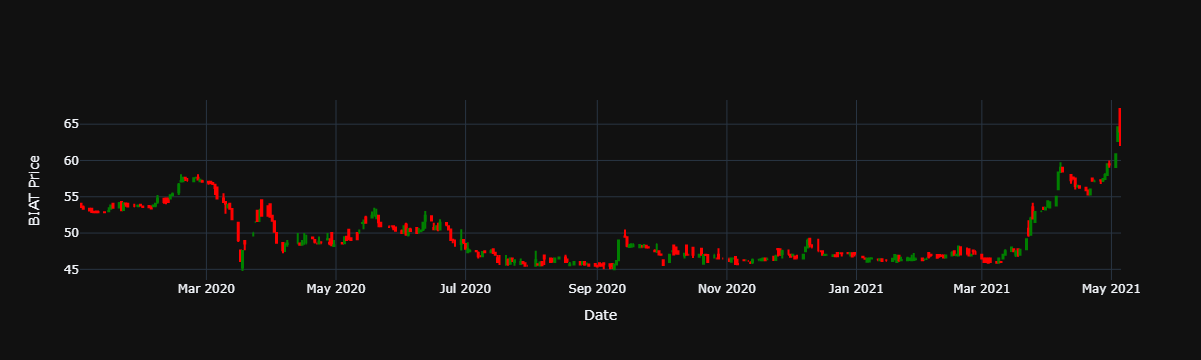

In [117]:
import plotly.graph_objects as go

BIA = BIAT['2020-01':'2021-05']
chart = go.Figure(
    data= [
        go.Candlestick( 
            x = BIA.index,
            low = BIA.Low,
            high = BIA.High,
            close = BIA.Close,
            open = BIA.Open,
            increasing_line_color = 'green',
            decreasing_line_color = "red")])

chart.update_layout(xaxis_rangeslider_visible=False, template= 'plotly_dark')
chart.update_layout(yaxis_title = "BIAT Price", xaxis_title = "Date")
chart.show()

#### Panique = Profit !! 


La bonne stratégie après chaque crise (Selling squeez due à un evennement soudains) est de commencer d'achter à plusieur prix juste après l'apparition des gros selling volumes en diversifiant votre portefeuille. Là où de nouvaux buying volumes entre (des banques qui injecte de l'argent pour supporter la valeur des actions, bond de trésor ...) le bon signal.

### Analyse Technique 

- On va représenter graphiquement l'évolution du cours de BIAT et STB du 2010 jusqu'aujourd'hui en estimant leur Tendance avec la Moyenne Mobile de période 10 (court-term) et la Moynne Mobile de période 54 à long terme. Puis on va se concentrer sur la periode 2020-01 : 2021-05.



In [103]:
def simple_chart(Ticker):
    if Ticker == 'BIAT':
        mpf.plot(BIAT,
        type = 'candle',
        title = "BIAT Price",
        volume = True,
        mav =(10, 54),
        tight_layout= True,
        style = 'yahoo',
        figsize=(20,10))
    else:
        mpf.plot(STB,
        type = 'candle',
        title = "STB Price",
        volume = True,
        mav =(10, 54),
        tight_layout= True,
        style = 'yahoo',
        figsize=(20,10))
        
interact(simple_chart, Ticker = ['BIAT','STB'])

interactive(children=(Dropdown(description='Ticker', options=('BIAT', 'STB'), value='BIAT'), Output()), _dom_c…

<function __main__.simple_chart(Ticker)>

#### Price action analysis pour la période 2020-01 : 2021-05

- On a crée une fonction qui permet de visualiser les charts graphiques des deux marché de manière rapide et inetractive 

In [104]:
def advanced_chart(Ticker):
    if Ticker == "BIAT":
        BIAT['34ma'] = BIAT.Close.rolling(window = 34).mean()
        BIA = BIAT['2020-01':'2021-05']
        chart = go.Figure(
        data= [
            go.Candlestick(
                x = BIA.index,
                low = BIA.Low,
                high = BIA.High,
                close = BIA.Close,
                open = BIA.Open,
                increasing_line_color = 'green',
                decreasing_line_color = "red")])

        chart.add_trace(go.Scatter(x=BIA.index,
                                  y = BIA['34ma'],
                                  line = dict(color = "#e0e0e0"),
                                  name = '34 day MA'))


        chart.update_layout(xaxis_rangeslider_visible=False, template= 'plotly_dark')
        chart.update_layout(yaxis_title = "BIAT Price", xaxis_title = "Date")
        chart.show()
        
    if Ticker == "STB":
        STB['34ma'] = STB.Close.rolling(window = 34).mean()
        ST = STB['2020-01':'2021-05']
        chart2 = go.Figure(
        data= [
            go.Candlestick(
                x = ST.index,
                low = ST.Low,
                high = ST.High,
                close = ST.Close,
                open = ST.Open,
                increasing_line_color = 'green',
                decreasing_line_color = "red")])

        chart2.add_trace(go.Scatter(x= ST.index,
                                  y = ST['34ma'],
                                  line = dict(color = "#e0e0e0"),
                                  name = '34 day MA'))


        chart2.update_layout(xaxis_rangeslider_visible=False, template= 'plotly_dark')
        chart2.update_layout(yaxis_title = "STB Price", xaxis_title = "Date")
        chart2.show()
        
interact(advanced_chart, Ticker = ['BIAT','STB'])


interactive(children=(Dropdown(description='Ticker', options=('BIAT', 'STB'), value='BIAT'), Output()), _dom_c…

<function __main__.advanced_chart(Ticker)>

- on a récupèré les valeurs des indicateurs techniques calculées par Investing.com pour notre example BIAT et ATB avec leur signal afin d'avoir une idée rapide sur le comportement de ces marchés et meme augmenter la probabilité de prendre une bonne décision d'investissment.

In [115]:
def tech_analys(Ticker):
    if Ticker == 'BIAT':
        return investpy.technical.technical_indicators(name = 'BIAT', country = Tun,
                                                product_type = 'stock', interval='daily')
    elif Ticker == 'STB':
        return investpy.technical.technical_indicators(name = 'STB', country = Tun,
                                                product_type = 'stock', interval='daily')
interact(tech_analys, Ticker = ['BIAT','STB'])



interactive(children=(Dropdown(description='Ticker', options=('BIAT', 'STB'), value='BIAT'), Output()), _dom_c…

<function __main__.tech_analys(Ticker)>

#### Candlestick Pattern Recognition

In [14]:
import talib

morning_star = talib.CDLMORNINGSTAR(BIAT.Open, BIAT.High, BIAT.Low, BIAT.Close)

engulfing = talib.CDLENGULFING(BIAT.Open, BIAT.High, BIAT.Low, BIAT.Close)

engulfing[engulfing != 0]



Date
2010-06-24    100
2010-08-30    100
2010-12-23   -100
2011-03-09   -100
2011-03-16    100
             ... 
2020-11-23   -100
2021-02-23   -100
2021-03-09    100
2021-03-31    100
2021-05-03    100
Length: 97, dtype: int32

In [119]:
BIAT['2010-06-24':'2010-07-25']

,Open,High,Low,Close,Volume,Daily_Change,Daily_pct_Change,Daily_log_rtn,34ma
Date,,,,,,,,,
2010-06-24,78.91,79.29,78.80,79.29,5976,-0.38,0.0047,0.0047,NaN
2010-06-25,79.25,79.25,78.84,78.84,2569,0.41,-0.0057,-0.0057,NaN
2010-06-28,78.80,79.00,78.80,78.84,1303,-0.04,0.0000,0.0000,NaN
2010-06-29,78.84,79.00,78.60,79.00,4268,-0.16,0.0020,0.0020,NaN
2010-06-30,78.95,79.30,78.80,78.80,4045,0.15,-0.0025,-0.0025,NaN
2010-07-01,79.00,79.00,79.00,79.00,50,0.00,0.0025,0.0025,NaN
2010-07-02,79.00,79.00,78.62,78.62,1604,0.38,-0.0048,-0.0048,NaN
2010-07-05,78.98,79.30,78.50,79.21,4793,-0.23,0.0075,0.0075,NaN
2010-07-06,79.00,79.20,79.00,79.20,1600,-0.20,-0.0001,-0.0001,NaN


## Etude de relations entre les différents marchés


#### Corrélation

In [15]:
close_list=[]
for stock in stock_list : 
    returns=get_data(Tun, stock, s_date, e_date)
    returns.rename(columns={'Close': stock}, inplace=True)
    returns=returns[stock]
    close_list.append(returns)

In [16]:
close_df=pd.DataFrame(close_list)
close_df
close_df=close_df.transpose()
close_df

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK
Date,,,,,,,,,,,
2010-05-26,14.85,13.72,27.41,7.91,79.73,10.60,49.13,21.48,23.60,37.60,21.90
2010-05-27,15.00,13.95,27.42,7.84,79.51,10.56,48.67,21.44,23.60,38.00,21.98
2010-05-28,14.90,14.00,27.50,7.84,79.50,10.59,48.00,21.44,23.60,37.75,21.61
2010-05-31,14.98,13.82,27.40,7.84,79.30,10.84,48.01,21.50,23.41,37.13,21.70
2010-06-01,14.99,14.00,27.40,7.86,79.41,10.79,48.67,21.40,23.30,38.62,21.71
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,3.04,7.49,9.50,2.70,59.47,6.56,NaN,16.30,34.20,23.00,6.81
2021-04-30,3.00,7.50,9.55,2.70,59.45,6.56,NaN,16.78,33.30,23.00,6.81
2021-05-03,3.00,7.60,9.65,2.68,60.87,6.64,NaN,16.60,33.20,22.75,NaN


In [10]:
print(close_df.describe())  

# il ya des missing values = problème pour kmeans, aparamaent fama des jours fi quelque marchés msakrin hors quotation
# donc hné lezem ikoun ana data frame que pour les jours ou tout les stock te3na quoté bech iwali ana dataframe me4ir missing
# missing value, meme yoldez testa3mel el dataframe bech te5dem el kmeans sans problème 

               STB          BNA           BH          ATB         BIAT  \
count  2604.000000  2633.000000  2467.000000  2588.000000  2678.000000   
mean      6.182531    10.727011    14.931711     4.720838    79.346187   
std       3.736267     2.810072     5.668825     1.179947    27.266983   
min       2.800000     6.150000     6.740000     2.670000    45.400000   
25%       3.897500     8.590000     9.715000     4.130000    61.200000   
50%       4.670000    10.290000    13.960000     4.440000    74.000000   
75%       7.800000    12.150000    18.690000     5.100000    88.000000   
max      22.000000    21.200000    33.190000     8.900000   177.000000   

                BT         UBCI          UIB           BS           AB  \
count  2700.000000  1453.000000  2694.000000  2714.000000  2691.000000   
mean      8.384400    31.307096    18.573059    26.365538    27.800643   
std       1.573929     9.076880     4.312464     8.994162     5.020646   
min       6.100000    20.000000    10

In [68]:
# solution pour le prob de missing value: faire un merge de Close des stock by index (dates index) , un par un avec loop
# modification de solution Nada :

stock_closes_df = pd.DataFrame(STB.Close) # il nous faut une df intiale pour faire le merge pour chaque itération dans le loop 
                                    # et avoir un nouveau df (on a deja df STB, donc on a pris le close STB.Close as df)
    
for stock in df_stock_list[1:] : # on va faire le merge  pour le reste des stock un par un 
    close_df = pd.DataFrame(stock.Close)                                          # avec df stock_closes_df
    stock_closes_df = pd.merge(stock_closes_df, close_df, left_index=True, right_index=True) # merge fnction 




In [69]:
# rename colomns (Close) par name stocks (stock_list)
stock_closes_df.columns = stock_list
stock_closes_df

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK
Date,,,,,,,,,,,
2010-05-26,14.85,13.72,27.41,7.91,79.73,10.60,49.13,21.48,23.60,37.60,21.90
2010-05-27,15.00,13.95,27.42,7.84,79.51,10.56,48.67,21.44,23.60,38.00,21.98
2010-05-28,14.90,14.00,27.50,7.84,79.50,10.59,48.00,21.44,23.60,37.75,21.61
2010-05-31,14.98,13.82,27.40,7.84,79.30,10.84,48.01,21.50,23.41,37.13,21.70
2010-06-01,14.99,14.00,27.40,7.86,79.41,10.79,48.67,21.40,23.30,38.62,21.71
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,3.13,7.30,9.20,2.80,58.49,6.80,21.94,16.40,34.10,22.45,6.80
2021-04-12,3.18,7.26,9.46,2.80,57.26,6.78,21.95,16.40,34.00,23.46,6.70
2021-04-14,3.12,7.30,9.40,2.79,56.49,6.74,22.60,16.40,33.40,23.80,6.80


In [12]:
# check missing values
stock_closes_df.isnull().sum()

STB      0
BNA      0
BH       0
ATB      0
BIAT     0
BT       0
UBCI     0
UIB      0
BS       0
AB       0
WIFAK    0
dtype: int64

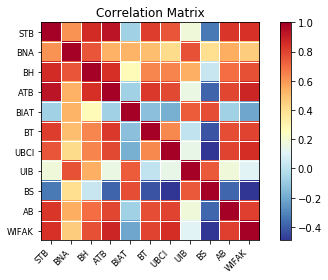

In [32]:
 import statsmodels.graphics.api as smg
    #calculate correlation
correlation = stock_closes_df.corr()
#plot correlation
smg.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

Les résultats de la corrélation entre deux actions peuvent varier de -1 à 1. Vous trouverez ci-dessous un bref résumé sur la manière d'interpréter les résultats:

Une corrélation positive signifie qu'une paire de rendements boursiers évolue étroitement ensemble et dans la même direction . Où +1 signifie que les rendements boursiers sont parfaitement corrélés.

Une corrélation de 0 entre une paire d'actions signifie qu'il n'y a pas de relation entre leurs rendements.

Une corrélation négative indique que les rendements boursiers de la paire d'actions évoluent dans des directions différentes. Plus la relation est proche de -1, plus la relation inverse est forte.

## Calcul de volatilité

- La volatilité d'une action est une mesure de la variation de la variance des rendements d'une action sur une période donnée. Il est courant de comparer la volatilité d'une action à une autre pour avoir une idée de celle qui peut présenter moins de risque ou à un indice de marché pour examiner la volatilité de l'action sur le marché global. En règle générale, plus la volatilité est élevée, plus l'investissement dans cette action est risqué, ce qui se traduit par un investissement dans l'un plutôt que dans l'autre.




#### The moving historical volatility

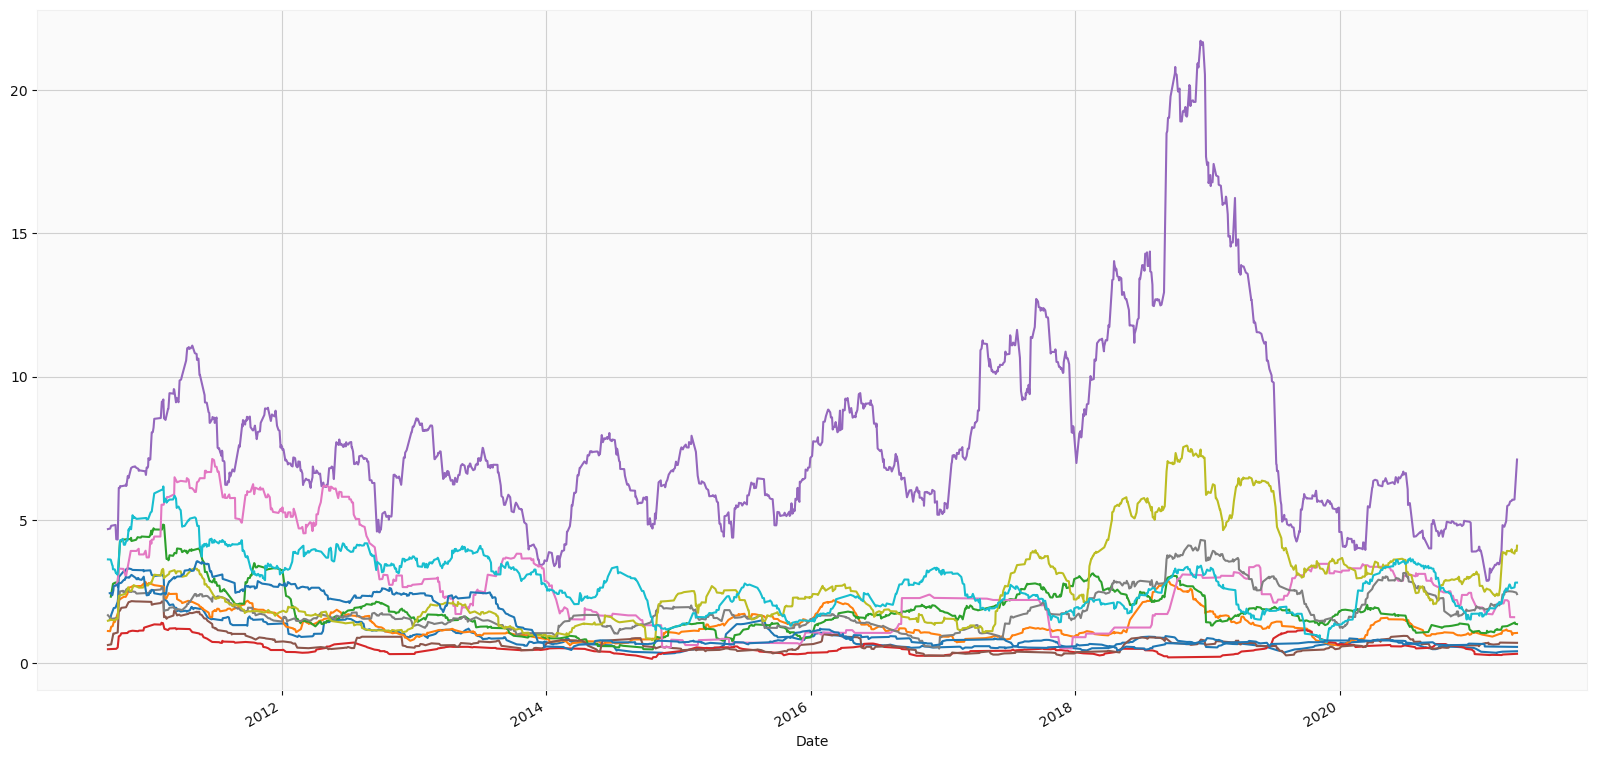

In [18]:
# une fonction pour calculer historical volatility de tt les marchés avec une periode de 75 et faire  
#le plot

min_period = 75
for i in [STB, BNA, BH, ATB, BIAT, BT, UBCI, UIB, BS, AB, WIFAK]:
    Volatility = i.Daily_Change.rolling(min_period).std()*np.sqrt(min_period)
    Volatility.plot(label ='s', figsize = (20,10))
    
plt.show()


#### 2020-01 : 2021-05

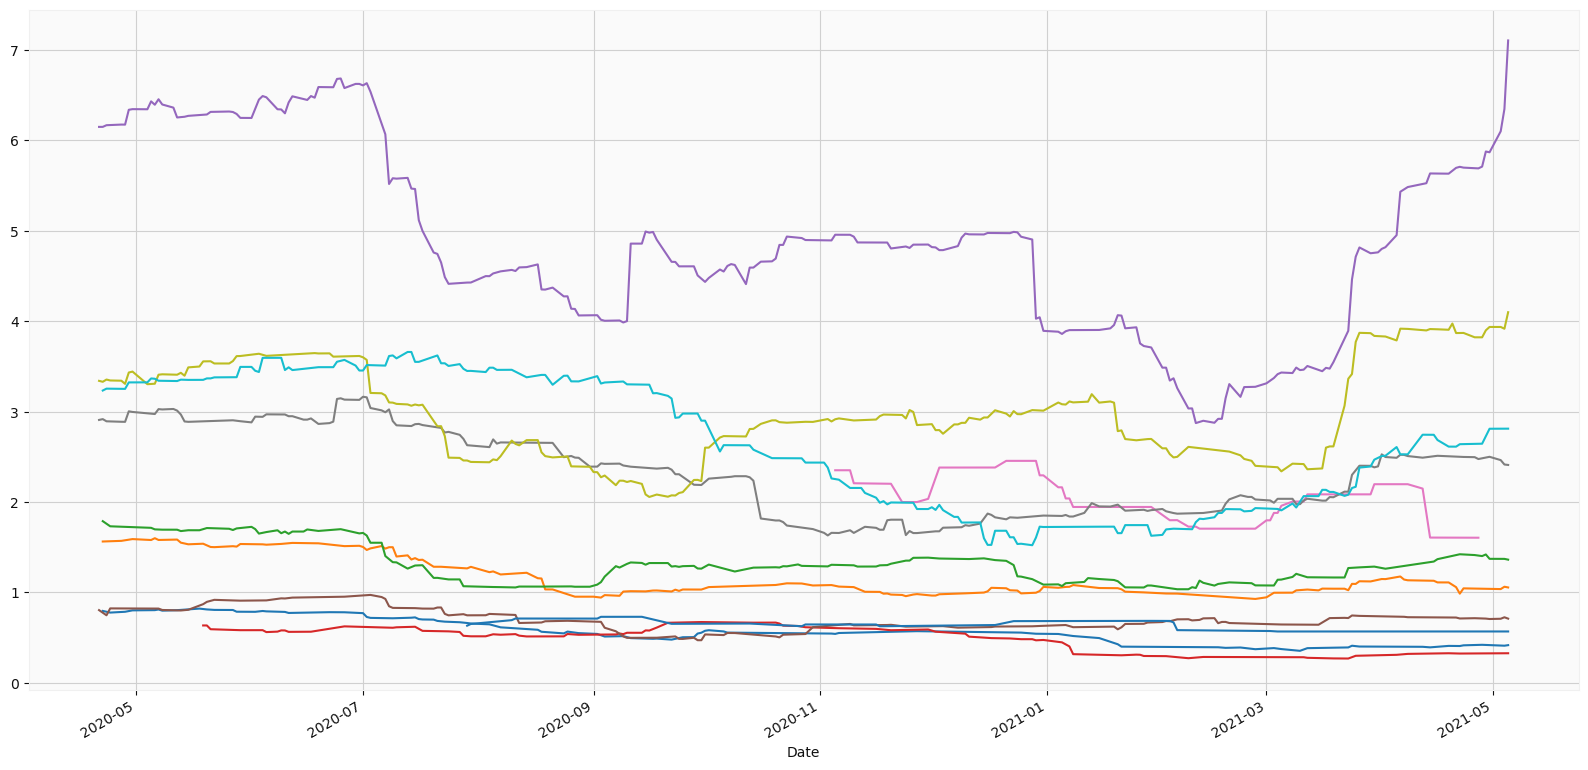

In [19]:
for i in [STB, BNA, BH, ATB, BIAT, BT, UBCI, UIB, BS, AB, WIFAK]:
    Volatility = i['2020-01':'2021-05'].Daily_Change.rolling(min_period).std()*np.sqrt(min_period)
    Volatility.plot(label ='s', figsize = (20,10))
    
plt.show()

## Volatilité annuelle & rendement annuelle

In [20]:

dict_stock = {}
i = 0

for stock in df_stock_list:
    return_annual = round(stock.Daily_pct_Change.mean()*252, 3)
    volatility_annual = round(stock.Daily_pct_Change.std()*np.sqrt(252), 3)
    
    dict_stock[stock_list[i]] = [return_annual, volatility_annual]
    i += 1

    

In [21]:
dict_stock

{'STB': [-0.113, 0.293],
 'BNA': [-0.023, 0.244],
 'BH': [-0.061, 0.291],
 'ATB': [-0.076, 0.232],
 'BIAT': [0.019, 0.253],
 'BT': [-0.027, 0.203],
 'UBCI': [-0.071, 0.35],
 'UIB': [-0.006, 0.195],
 'BS': [0.044, 0.202],
 'AB': [-0.03, 0.187],
 'WIFAK': [-0.074, 0.316]}

In [22]:
# convertir le dictionnaire en dataframe

risk_return_df = pd.DataFrame(dict_stock).T
risk_return_df.columns = ["return", "risk"]
risk_return_df

,return,risk
STB,-0.113,0.293
BNA,-0.023,0.244
BH,-0.061,0.291
ATB,-0.076,0.232
BIAT,0.019,0.253
BT,-0.027,0.203
UBCI,-0.071,0.350
UIB,-0.006,0.195
BS,0.044,0.202
AB,-0.030,0.187


## Kmeans application

In [23]:
dict_stock = {}

for stock in stock_list:
    return_annual = round(stock_closes_df[stock].pct_change().mean()*252, 3)
    volatility_annual = round(stock_closes_df[stock].pct_change().std()*np.sqrt(252), 3)
    
    dict_stock[stock] = [return_annual, volatility_annual]

In [24]:
dict_stock

{'STB': [-0.333, 0.483],
 'BNA': [-0.082, 0.456],
 'BH': [-0.178, 0.518],
 'ATB': [-0.211, 0.451],
 'BIAT': [0.027, 0.452],
 'BT': [-0.061, 0.378],
 'UBCI': [-0.117, 0.429],
 'UIB': [-0.016, 0.346],
 'BS': [0.18, 0.405],
 'AB': [-0.078, 0.319],
 'WIFAK': [-0.188, 0.451]}

In [90]:
risk_return_df = pd.DataFrame(dict_stock).T
risk_return_df.columns = ["return", "risk"]
risk_return_df

,return,risk
STB,-0.333,0.483
BNA,-0.082,0.456
BH,-0.178,0.518
ATB,-0.211,0.451
BIAT,0.027,0.452
BT,-0.061,0.378
UBCI,-0.117,0.429
UIB,-0.016,0.346
BS,0.180,0.405
AB,-0.078,0.319


Text(0, 0.5, 'Inertia')

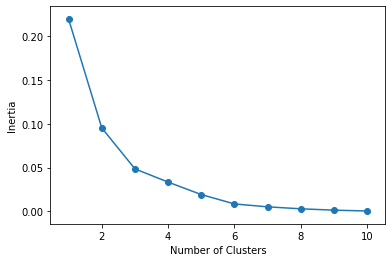

In [91]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(risk_return_df)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [92]:
model = KMeans (n_clusters=3)
model.fit(stock_closes_df)
stock_grp = model.predict(stock_closes_df)

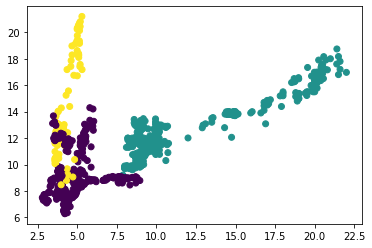

In [94]:
plt.scatter(stock_closes_df.iloc[:, 0], stock_closes_df.iloc[:, 1],  c=stock_grp, cmap='viridis')


## Ordinary Least-Squares Regression

- Prennant le prix d'actionBIAT, on va étudié si les autres marchés du secteur banquaire ont un effet sur le cours de BIAT.

In [25]:
stock_closes_df.head()

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK
Date,,,,,,,,,,,
2010-05-26,14.85,13.72,27.41,7.91,79.73,10.60,49.13,21.48,23.60,37.60,21.90
2010-05-27,15.00,13.95,27.42,7.84,79.51,10.56,48.67,21.44,23.60,38.00,21.98
2010-05-28,14.90,14.00,27.50,7.84,79.50,10.59,48.00,21.44,23.60,37.75,21.61
2010-05-31,14.98,13.82,27.40,7.84,79.30,10.84,48.01,21.50,23.41,37.13,21.70
2010-06-01,14.99,14.00,27.40,7.86,79.41,10.79,48.67,21.40,23.30,38.62,21.71


In [27]:
#SARAH
from sklearn.model_selection import train_test_split
import statsmodels.api as sn

# sans Scaling

X = stock_closes_df.drop(['BIAT'], axis = 1)
y = stock_closes_df.BIAT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


Xs = sn.add_constant(X_train)
lm = sn.OLS(y_train, Xs).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BIAT   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 26 May 2021   Prob (F-statistic):          3.17e-193
Time:                        15:06:55   Log-Likelihood:                -2800.0
No. Observations:                 709   AIC:                             5622.
Df Residuals:                     698   BIC:                             5672.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0880      7.305     -6.856      0.000     -64.431     -35.745
STB           -4.3304      0.404    -10.727      0.000      -5.123      -3.538
BNA            1.4355      0.446      3.222      0.001       0.561       2.310
BH             2.4888      0.320      7.772      0.000       1.860       3.117
ATB            4.6509      1.354      3.435      0.001       1.993       7.309
BT             3.1809      0.748      4.255      0.000       1.713       4.649
UBCI           0.5942      0.154      3.865      0.000       0.292       0.896
UIB           -0.4263      0.446     -0.955      0.340      -1.303       0.450
BS             1.5516      0.231      6.718      0.000       1.098       2.005
AB             0.9632      0.199      4.836      0.000       0.572       1.354
WIFAK         -1.9653      0.212     -9.251      0.000      -2.382      -1.548
==============================================================================
Omnibus:                      227.304   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.708
Skew:                          -1.584   Prob(JB):                    4.58e-145
Kurtosis:                       6.530   Cond. No.                         964.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

hnéé el interprétation déja pvlue ta3 UIB akber mel seuil 5% , donc ma3adhech effet al cours ta3 BIATwel be9i significative
t9oul UIB menech bech testa3mlouha fil modele regession te3na ... + el interprétation eli 9tlek aleha sur fb (notebook2 ...)

# Regression

In [38]:
X = stock_closes_df.drop(['UIB','BIAT'], axis = 1).values
y = stock_closes_df.BIAT.values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Features Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modèle

In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = linreg.predict(X_test)

## Mesure de performance pour la régression
habituellement, on utilise une mesure appelée Coefficient de détermination r2_score pour mesurer la qualité de la prédiction d'une régression linéaire.

**afficher le résultat obtenu**

In [44]:
res = pd.concat([pd.DataFrame(y_pred), pd.DataFrame(y_test)], axis = 1)
res.columns = ["Predicted_BIAT_Price", "Real_BIAT_Price"]
res.Predicted_BIAT_Price = round(res.Predicted_BIAT_Price, 2)
res

,Predicted_BIAT_Price,Real_BIAT_Price
0,59.75,70.00
1,83.95,90.00
2,66.92,64.50
3,78.86,77.51
4,84.93,81.00
...,...,...
173,85.46,79.03
174,77.41,81.00
175,89.37,80.10
176,58.15,65.00


#### R-squared measure

In [37]:
from sklearn.metrics import r2_score
perf = r2_score(y_pred, y_test)
print('Mesure de la qualité de la prédiction est : {:.2f} %'.format(perf*100))

Mesure de la qualité de la prédiction est : 59.34 %


#### Adjusted R-squared measure

In [47]:
Adj_r2 = 1-(1-perf)*(887-1)/(887-9-1)  # 887 : nobre d'observation , 9: nobre de variable

print('Mesure de la qualité de la prédiction est : {:.2f} %'.format(Adj_r2*100))


Mesure de la qualité de la prédiction est : 58.92 %


# Classification Problem

On va creé des modèle de prédiction là ou on va prédir la direction du cours pour le marché BIAT, soit à l'achat soit à la vente en fonction des autre marchés

In [49]:
stock_closes_df.tail()

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK
Date,,,,,,,,,,,
2021-04-08,3.13,7.30,9.20,2.80,58.49,6.80,21.94,16.40,34.10,22.45,6.8
2021-04-12,3.18,7.26,9.46,2.80,57.26,6.78,21.95,16.40,34.00,23.46,6.7
2021-04-14,3.12,7.30,9.40,2.79,56.49,6.74,22.60,16.40,33.40,23.80,6.8
2021-04-15,3.06,7.25,9.12,2.71,56.50,6.70,22.80,16.39,33.89,23.90,6.8
2021-04-16,3.06,7.17,9.10,2.70,56.25,6.60,23.48,16.39,33.40,23.90,6.8


In [72]:
stock_closes_df = pd.merge(stock_closes_df, pd.DataFrame(BIAT.Open), left_index=True, right_index=True)

In [51]:
stock_closes_df.head()

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK,Open
Date,,,,,,,,,,,,
2010-05-26,14.85,13.72,27.41,7.91,79.73,10.60,49.13,21.48,23.60,37.60,21.90,80.2
2010-05-27,15.00,13.95,27.42,7.84,79.51,10.56,48.67,21.44,23.60,38.00,21.98,80.0
2010-05-28,14.90,14.00,27.50,7.84,79.50,10.59,48.00,21.44,23.60,37.75,21.61,79.6
2010-05-31,14.98,13.82,27.40,7.84,79.30,10.84,48.01,21.50,23.41,37.13,21.70,79.5
2010-06-01,14.99,14.00,27.40,7.86,79.41,10.79,48.67,21.40,23.30,38.62,21.71,79.4


In [73]:
Direction = []
for i in (stock_closes_df.BIAT - stock_closes_df.Open):
    if i > 0:
        Direction.append(1)
    else:
        Direction.append(0)
 


In [74]:
stock_closes_df["Direction"] = Direction
stock_closes_df

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK,Open,Direction
Date,,,,,,,,,,,,,
2010-05-26,14.85,13.72,27.41,7.91,79.73,10.60,49.13,21.48,23.60,37.60,21.90,80.20,0
2010-05-27,15.00,13.95,27.42,7.84,79.51,10.56,48.67,21.44,23.60,38.00,21.98,80.00,0
2010-05-28,14.90,14.00,27.50,7.84,79.50,10.59,48.00,21.44,23.60,37.75,21.61,79.60,0
2010-05-31,14.98,13.82,27.40,7.84,79.30,10.84,48.01,21.50,23.41,37.13,21.70,79.50,0
2010-06-01,14.99,14.00,27.40,7.86,79.41,10.79,48.67,21.40,23.30,38.62,21.71,79.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,3.13,7.30,9.20,2.80,58.49,6.80,21.94,16.40,34.10,22.45,6.80,59.00,0
2021-04-12,3.18,7.26,9.46,2.80,57.26,6.78,21.95,16.40,34.00,23.46,6.70,58.00,0
2021-04-14,3.12,7.30,9.40,2.79,56.49,6.74,22.60,16.40,33.40,23.80,6.80,57.50,0


In [75]:
stock_closes_df.Direction = stock_closes_df.Direction.shift(-1)
stock_closes_df.tail()

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK,Open,Direction
Date,,,,,,,,,,,,,
2021-04-08,3.13,7.30,9.20,2.80,58.49,6.80,21.94,16.40,34.10,22.45,6.8,59.00,0.0
2021-04-12,3.18,7.26,9.46,2.80,57.26,6.78,21.95,16.40,34.00,23.46,6.7,58.00,0.0
2021-04-14,3.12,7.30,9.40,2.79,56.49,6.74,22.60,16.40,33.40,23.80,6.8,57.50,1.0
2021-04-15,3.06,7.25,9.12,2.71,56.50,6.70,22.80,16.39,33.89,23.90,6.8,56.49,0.0
2021-04-16,3.06,7.17,9.10,2.70,56.25,6.60,23.48,16.39,33.40,23.90,6.8,56.46,NaN


In [76]:
stock_closes_df = stock_closes_df.dropna()
stock_closes_df.tail()

,STB,BNA,BH,ATB,BIAT,BT,UBCI,UIB,BS,AB,WIFAK,Open,Direction
Date,,,,,,,,,,,,,
2021-04-06,3.15,7.25,8.90,2.84,58.35,6.86,21.10,16.55,33.78,22.45,6.8,56.05,0.0
2021-04-08,3.13,7.30,9.20,2.80,58.49,6.80,21.94,16.40,34.10,22.45,6.8,59.00,0.0
2021-04-12,3.18,7.26,9.46,2.80,57.26,6.78,21.95,16.40,34.00,23.46,6.7,58.00,0.0
2021-04-14,3.12,7.30,9.40,2.79,56.49,6.74,22.60,16.40,33.40,23.80,6.8,57.50,1.0
2021-04-15,3.06,7.25,9.12,2.71,56.50,6.70,22.80,16.39,33.89,23.90,6.8,56.49,0.0


In [59]:
stock_closes_df.isna().sum()

STB          0
BNA          0
BH           0
ATB          0
BIAT         0
BT           0
UBCI         0
UIB          0
BS           0
AB           0
WIFAK        0
Open         0
Direction    0
dtype: int64

# Modèle de prédiction

In [77]:
copie = stock_closes_df

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [78]:
X = stock_closes_df.drop(['Open','Direction'], axis = 1).values
y = stock_closes_df.Direction.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

sc = MinMaxScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

#### 1. Logistic Regression

In [79]:
logis = LogisticRegression(random_state = 42)

params = {'C': np.logspace(-4, 4, 50),
          'penalty' : ['l1', 'l2']}

classifier_logis = GridSearchCV(logis, param_grid= params, cv = 10, n_jobs= -1,
                              verbose= 1, scoring='accuracy')

classifier_logis.fit(X_train_sc, y_train)

print("Best Accuracy: {:.2f} %".format(classifier_logis.best_score_*100))
print("Best Parameters:", classifier_logis.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Best Accuracy: 58.74 %
Best Parameters: {'C': 0.0001, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.8s finished


#### 2. K — Nearest Neighbor Classifier

In [81]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(2, 7)}

classifier_knn = GridSearchCV(knn, param_grid= params, cv = 10, n_jobs= -1,
                              verbose= 1, scoring='accuracy')

classifier_knn.fit(X_train_sc, y_train)

print("Best Accuracy: {:.2f} %".format(classifier_knn.best_score_*100))
print("Best Parameters:", classifier_knn.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Accuracy: 62.65 %
Best Parameters: {'n_neighbors': 2}


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


#### 3. Support Vector Classifier

In [93]:
svc = SVC(random_state = 42)

params = {'kernel': ['rbf'],'C': (0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10,100,500,1000),
     'gamma':(0.001, 0.01, 0.1, 0.5, 1)}


classifier_svc = GridSearchCV(svc, param_grid=params, cv = 10, n_jobs= -1,
                              verbose= 1, scoring='accuracy')

classifier_svc.fit(X_train_sc, y_train)

print("Best Accuracy: {:.2f} %".format(classifier_svc.best_score_*100))
print("Best Parameters:", classifier_svc.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s


Best Accuracy: 60.69 %
Best Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.0s finished


#### 4. MLP Classifier

In [87]:
mlp = MLPClassifier( random_state = 42)

params = {
    'hidden_layer_sizes': [(10,30,10),(20,),(10),(30,30,30)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1, 0.01, 0.001, 0.0001],
    'learning_rate': ['constant','adaptive']
}

classifier_mlp = GridSearchCV(mlp, param_grid=params, cv = 10, n_jobs= -1,
                              verbose= 1, scoring='accuracy') 


classifier_mlp.fit(X_train_sc, y_train)

print("Best Accuracy: {:.2f} %".format(classifier_mlp.best_score_*100))
print("Best Parameters:", classifier_mlp.best_params_)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   51.8s


Best Accuracy: 58.74 %
Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:   56.7s finished


#### 5. Decision Tree Classifier

In [86]:
dtree = DecisionTreeClassifier(random_state = 42)
params = params = {
    'criterion': ('gini','entropy'), 
    'max_depth': range(2,7), 
    'max_features':range(3,11)
}

classifier_dtree = GridSearchCV(dtree, param_grid=params, cv = 10, n_jobs= -1,
                              verbose= 1, scoring='accuracy')

classifier_dtree.fit(X_train_sc, y_train)

print("Best Accuracy: {:.2f} %".format(classifier_dtree.best_score_*100))
print("Best Parameters:", classifier_dtree.best_params_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Best Accuracy: 61.76 %
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 3}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.4s finished


#### 6. Random Forest Classifier

In [83]:
rfc = RandomForestClassifier(random_state=42)
params = { 
    'n_estimators': [200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 9),
    'criterion' :['gini', 'entropy']
}

classifier_rfc = GridSearchCV(rfc, param_grid=params, cv = 10, n_jobs= -1,
                              verbose= 1, scoring='accuracy')

classifier_rfc.fit(X_train_sc, y_train)

print("Best Accuracy: {:.2f} %".format(classifier_rfc.best_score_*100))
print("Best Parameters:", classifier_rfc.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.5min finished


Best Accuracy: 61.43 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


### 7. Adaboost Classifier

In [84]:
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion ='entropy',
                                               max_depth= 5,
                                               max_features = 3), random_state= 42)
params = {
    'n_estimators':[10,50,250,500,1000,2000],
    'learning_rate':[0.01,0.1,1],
    'algorithm':('SAMME.R', 'SAMME')}

classifier_ada = GridSearchCV(ada, param_grid=params, cv = 10, n_jobs= -1,
                              verbose= 1, scoring='accuracy')

classifier_ada.fit(X_train_sc, y_train)

print("Best Accuracy: {:.2f} %".format(classifier_ada.best_score_*100))
print("Best Parameters:", classifier_ada.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.4min finished


Best Accuracy: 61.00 %
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 50}


### Model avec le meilleur accuracy score

In [100]:
model_list= {
    logis:classifier_logis, knn:classifier_knn, svc:classifier_svc,
    mlp:classifier_mlp, dtree:classifier_dtree, rfc:classifier_rfc,
    ada:classifier_ada
            }


for model in model_list:
    y_pred = model_list[model].predict(X_test_sc)
    print(model.__class__.__name__, "{:.2f} %".format(round(accuracy_score(y_test, y_pred),3)*100))


LogisticRegression 58.60 %
KNeighborsClassifier 57.70 %
SVC 56.80 %
MLPClassifier 58.60 %
DecisionTreeClassifier 54.50 %
RandomForestClassifier 58.10 %
AdaBoostClassifier 52.30 %
